<a href="https://colab.research.google.com/github/elyesboujelben1/gomycode/blob/main/checkpoint7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic-passengers.csv",";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [86]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.isnull().sum()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,NaN,S


In [87]:

df["Embarked"].fillna("S",inplace=True)
df.isnull().sum()

df.dropna(1,inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [88]:
NewSex={
    "Sex": {"female":0,"male":1}
}
df.replace(NewSex,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,S


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X=df[["Age", "Parch", "Sex","SibSp"]]
y=df["Survived"]
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.35,random_state=15) 


In [90]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree=tree.DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=5,min_samples_leaf=1,max_depth=3)
dtree.fit(trainX, trainy)   #fitting our model
y_pred=dtree.predict(testX)   # evaluating our model
print("score:{}".format(accuracy_score(testy, y_pred)))


score:0.8108974358974359


[Text(930.0, 951.3000000000001, 'X[2] <= 0.073\ngini = 0.469\nsamples = 100.0%\nvalue = [0.625, 0.375]'),
 Text(558.0, 679.5, 'X[3] <= 4.991\ngini = 0.404\nsamples = 33.9%\nvalue = [0.281, 0.719]'),
 Text(372.0, 407.70000000000005, 'X[1] <= 3.694\ngini = 0.39\nsamples = 33.2%\nvalue = [0.266, 0.734]'),
 Text(186.0, 135.89999999999998, 'gini = 0.371\nsamples = 32.3%\nvalue = [0.246, 0.754]'),
 Text(558.0, 135.89999999999998, 'gini = 0.0\nsamples = 0.9%\nvalue = [1.0, 0.0]'),
 Text(744.0, 407.70000000000005, 'gini = 0.0\nsamples = 0.7%\nvalue = [1.0, 0.0]'),
 Text(1302.0, 679.5, 'X[3] <= 0.794\ngini = 0.318\nsamples = 66.1%\nvalue = [0.802, 0.198]'),
 Text(1116.0, 407.70000000000005, 'gini = 0.291\nsamples = 49.9%\nvalue = [0.824, 0.176]'),
 Text(1488.0, 407.70000000000005, 'gini = 0.39\nsamples = 16.2%\nvalue = [0.734, 0.266]')]

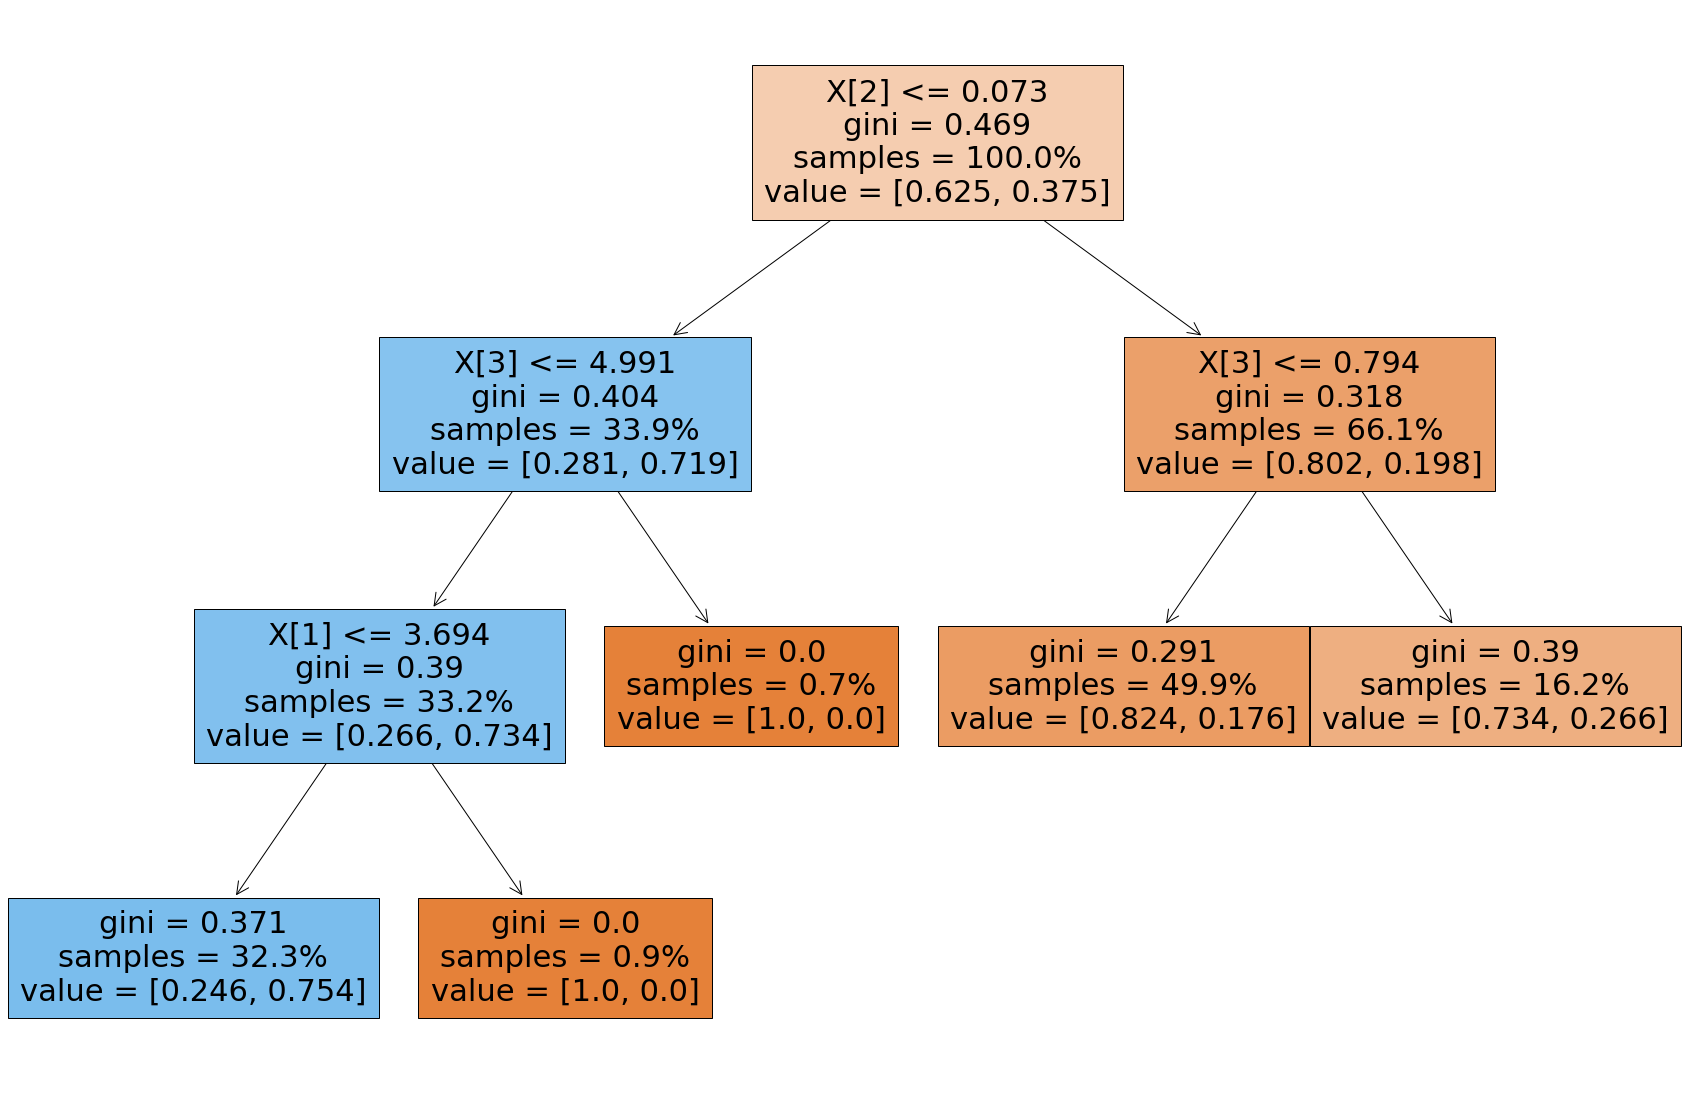

In [91]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))

plot_tree(dtree,filled=True,proportion =True)


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X=df[["Pclass", "Parch", "Sex","PassengerId"]]
y=df["Survived"]
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.35,random_state=15) 


In [93]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree=tree.DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=5,min_samples_leaf=1,max_depth=3)
dtree.fit(trainX, trainy)   #fitting our model
y_pred=dtree.predict(testX)   # evaluating our model
print("score:{}".format(accuracy_score(testy, y_pred)))


score:0.7756410256410257


[Text(837.0, 951.3000000000001, 'X[2] <= 0.607\ngini = 0.469\nsamples = 100.0%\nvalue = [0.625, 0.375]'),
 Text(418.5, 679.5, 'X[0] <= 2.369\ngini = 0.404\nsamples = 33.9%\nvalue = [0.281, 0.719]'),
 Text(209.25, 407.70000000000005, 'gini = 0.089\nsamples = 18.5%\nvalue = [0.047, 0.953]'),
 Text(627.75, 407.70000000000005, 'gini = 0.492\nsamples = 15.4%\nvalue = [0.562, 0.438]'),
 Text(1255.5, 679.5, 'X[0] <= 2.867\ngini = 0.318\nsamples = 66.1%\nvalue = [0.802, 0.198]'),
 Text(1046.25, 407.70000000000005, 'X[0] <= 1.672\ngini = 0.418\nsamples = 25.6%\nvalue = [0.703, 0.297]'),
 Text(837.0, 135.89999999999998, 'gini = 0.476\nsamples = 14.2%\nvalue = [0.61, 0.39]'),
 Text(1255.5, 135.89999999999998, 'gini = 0.298\nsamples = 11.4%\nvalue = [0.818, 0.182]'),
 Text(1464.75, 407.70000000000005, 'gini = 0.235\nsamples = 40.6%\nvalue = [0.864, 0.136]')]

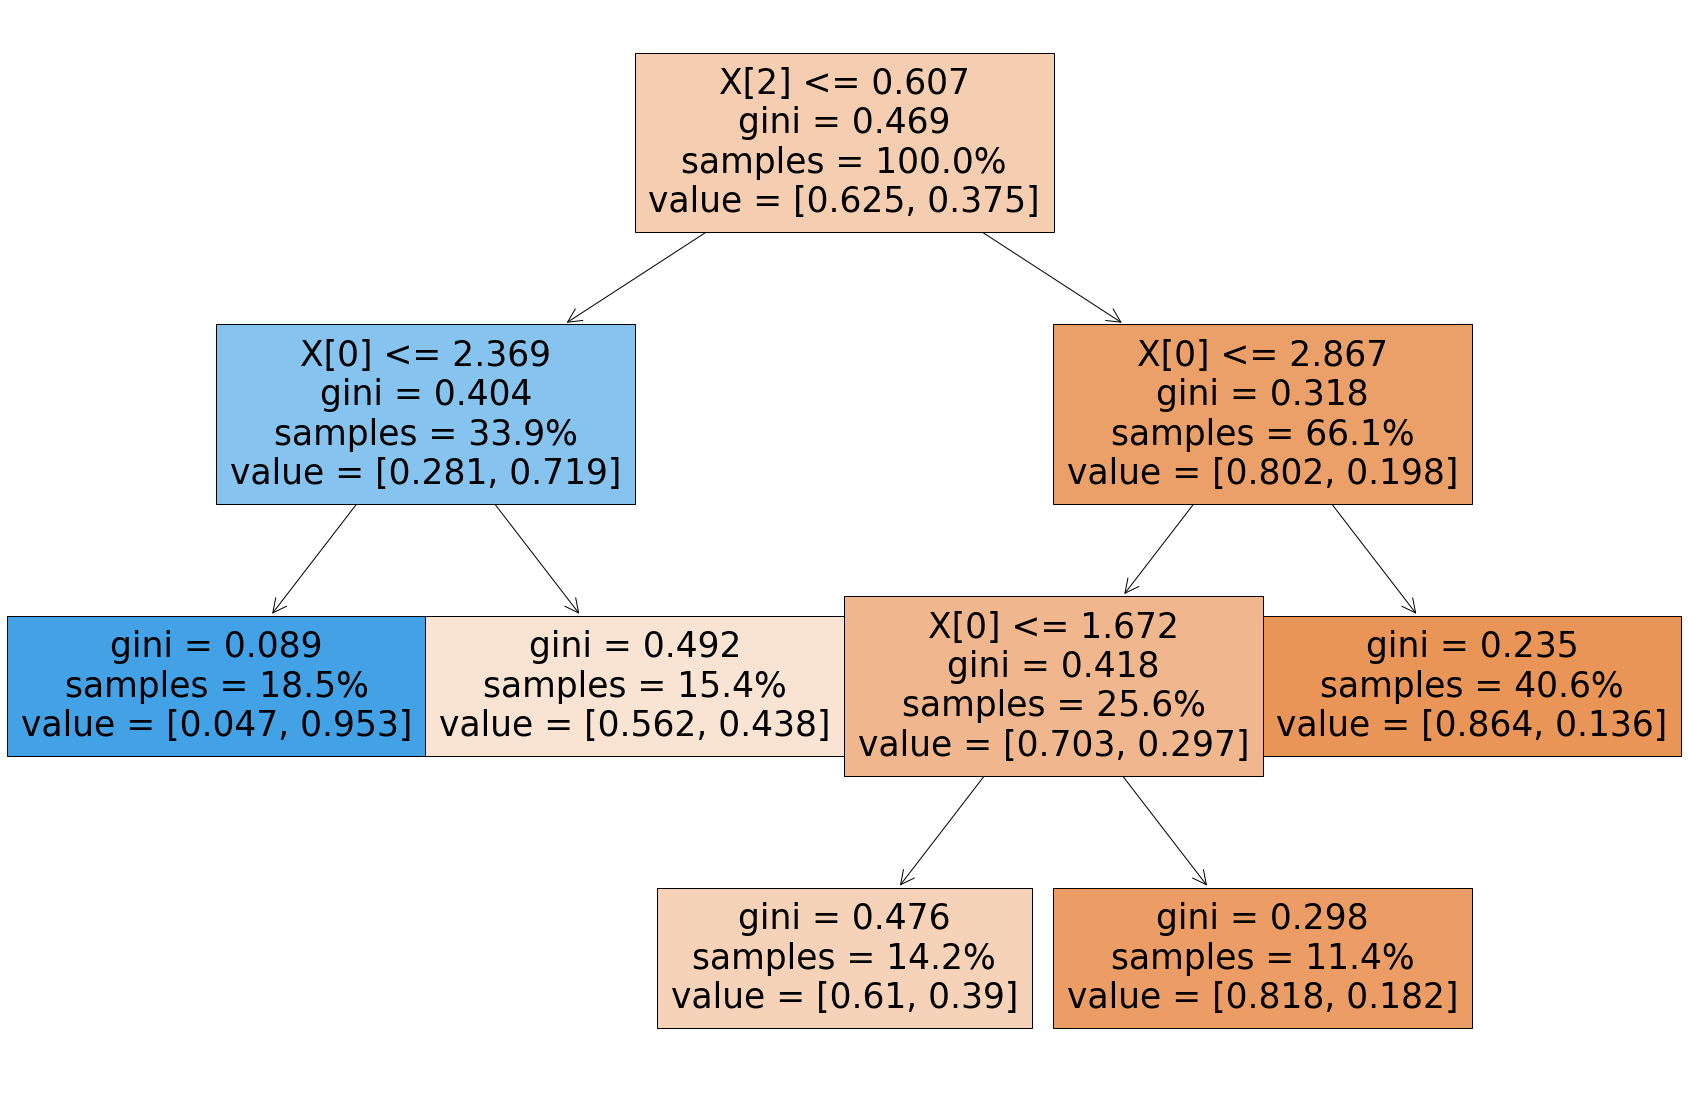

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))

plot_tree(dtree,filled=True,proportion =True)


the first tree has a better precision than the second tree which means that the parameters used in the first tree are more useful than the parameters used in second tree

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X=df[["Age", "Parch", "Sex","SibSp"]]
y=df["Survived"]
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.35,random_state=15) 


In [101]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(trainX, trainy)  #Training our model
y_pred=clf.predict(testX)  #testing our model
print("Accuracy:", metrics.accuracy_score(testy, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7628205128205128


In [102]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

clf=RandomForestClassifier(n_estimators=5)  #Creating a random forest with 100 decision trees
clf.fit(trainX, trainy)  #Training our model
y_pred=clf.predict(testX)  #testing our model
print("Accuracy:", metrics.accuracy_score(testy, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7467948717948718


In [103]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(trainX, trainy)  #Training our model
y_pred=clf.predict(testX)  #testing our model
print("Accuracy:", metrics.accuracy_score(testy, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7532051282051282


through testing, it turns out that random forest with 10 estimator has the best accuracy compared to to other random trees with different number of estimators
Still the decision tree is more accurate than the random tree